<a href="https://colab.research.google.com/github/bhupendrak9917/My-AI-Projects/blob/main/MNIST_Streamlit/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

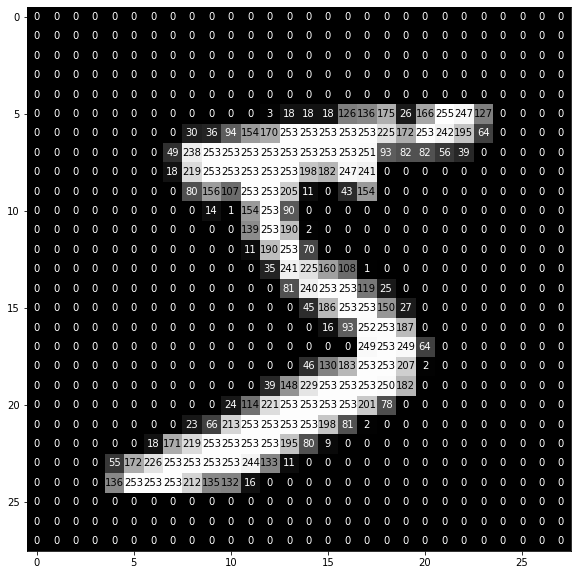

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train[0], ax)
plt.show()

In [ ]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


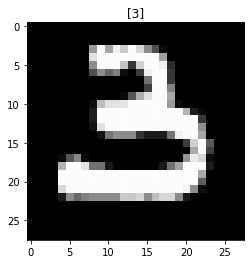

In [ ]:
# lets see some random images and its labels
import random
import matplotlib.pyplot as plt
i = random.randint(0,60000)
plt.imshow(x_train[i],cmap='gray') # Color map
plt.title([y_train[i]])
plt.show()

In [ ]:
# How many images are there in every digit?
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [ ]:
# Normalization : Scaling down the value to a specific range(0-1)
x_train=x_train/255
x_test = x_test/255

In [ ]:
# AFter Normalization
print(x_train.max())
print(x_train.min())

1.0
0.0


In [ ]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.models.Sequential()
model.add(Flatten(input_shape=(28,28))) # 784
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2301 - accuracy: 0.9332 - val_loss: 0.1202 - val_accuracy: 0.9643
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0938 - accuracy: 0.9714 - val_loss: 0.0988 - val_accuracy: 0.9725
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0600 - accuracy: 0.9818 - val_loss: 0.0956 - val_accuracy: 0.9697
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0436 - accuracy: 0.9862 - val_loss: 0.0847 - val_accuracy: 0.9748
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0818 - val_accuracy: 0.9783
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0219 - accuracy: 0.9932 - val_loss: 0.0869 - val_accuracy: 0.9780
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.0932 - val_accuracy:

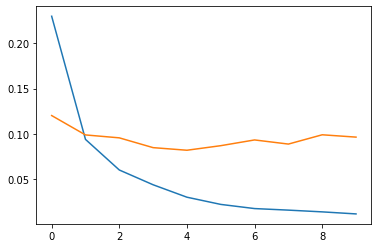

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

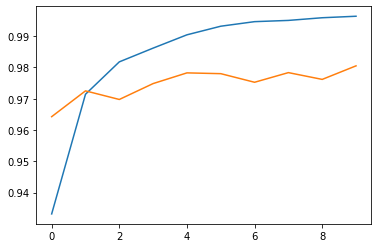

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
# Evaluate on test data

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from keras.preprocessing import image

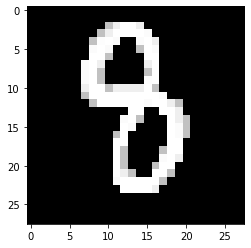

In [ ]:
img = image.load_img(path="/content/drive/MyDrive/Minor Project <Bhupendra Kumar>/num.png", color_mode= 'grayscale', target_size=(28, 28))
img = image.img_to_array(img)
plt.imshow(image.array_to_img(img), cmap="gray")
img = img.astype('float')/255
test_img = img.reshape((1, 28, 28, 1))
#img_class = model.predict_classes(test_img)
img_class = np.argmax(model.predict(test_img), axis = 1)
prediction = img_class[0]

In [ ]:
prediction

8

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_pred,y_test)

0.981

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 972,    0,    6,    1,    3,    2,    2,    1,    1,    3],
       [   1, 1129,    1,    0,    1,    0,    3,    3,    0,    3],
       [   1,    2, 1002,    2,    1,    0,    2,    7,    1,    0],
       [   1,    0,    8,  989,    0,    6,    1,    2,    4,    5],
       [   0,    0,    2,    0,  960,    1,    1,    1,    0,    8],
       [   2,    0,    1,    5,    0,  873,    5,    0,    5,    3],
       [   0,    1,    3,    0,    4,    4,  942,    0,    1,    0],
       [   1,    0,    3,    4,    2,    0,    0, 1006,    1,    6],
       [   2,    3,    5,    3,    0,    5,    2,    2,  958,    2],
       [   0,    0,    1,    6,   11,    1,    0,    6,    3,  979]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       991
           1       0.99      0.99      0.99      1141
           2       0.97      0.98      0.98      1018
           3       0.98      0.97      0.98      1016
           4       0.98      0.99      0.98       973
           5       0.98      0.98      0.98       894
           6       0.98      0.99      0.98       955
           7       0.98      0.98      0.98      1023
           8       0.98      0.98      0.98       982
           9       0.97      0.97      0.97      1007

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
model.save("mnist.hdf5")

INFO:tensorflow:Assets written to: mnist./assets


INFO:tensorflow:Assets written to: mnist./assets
